In [10]:
import pandas as pd
import sympy
import matplotlib
from sympy import Matrix, latex, lambdify
from sympy import pi as Pi
from sympy import cos as Cos
from sympy import sin as Sin
import matplotlib.pyplot as plt

from IPython.display import Latex, display, Math

# Практическое занятие 13
# Компьютерный практикум по алгебре на Python
## Линейные операторы на плоскости и в пространстве
### Задание 1.
Написать функцию, составляющую матрицу линейного оператора поворота на $\alpha$ градусов или радиан **по** или **против часовой стрелки** на плоскости. Параметры: обязательные - угол поворота, необязательные - тип меры угла (градусы или радианы), направление поворота (по или против часовой стрелки). Значения по умолчанию - против часовой стрелки в радианах.

Использовать полученную функцию для выведения на экран координат векторов, полученных поворотом вектора [1, 2]

1) на 10, 20, 45 градусов **по  часовой стрелке**

2) на $\pi/3$ радиан **против часовой стрелки**.

In [11]:
def rotate_vec(vect: sympy.Matrix, angle: float, angle_measure: str, direction: str) -> sympy.Matrix:
    angle_alpha = angle
    if angle_measure == "deg":
        angle_alpha = angle * Pi / 180
    elif angle_measure == "rad":
        None
    else:
        print("\033[1;31m error: invalid symbols \033[0m")

    if direction == '->':  # по часовой
        M = Matrix([[Cos(angle_alpha), -Sin(angle_alpha)], [Sin(angle_alpha), Cos(angle_alpha)]])
    elif direction == '<-':  # против часовой
        M = Matrix([[Cos(angle_alpha), Sin(angle_alpha)], [-Sin(angle_alpha), Cos(angle_alpha)]])
    else:
        print("\033[1;31m error: invalid symbols \033[0m")

    res_vect = M * vect

    return res_vect


a = Matrix([1, 2])

for angle in [10, 20, 45]:
    rotated_vec = rotate_vec(a, angle, 'deg', '->')
    display(Latex(
        r'$$\alpha_{deg}' + fr'= {latex(angle)}:\ \left( 1, 2 \right) \rightarrow \left( {latex(rotated_vec[0])},\ {latex(rotated_vec[1])} \right) \approx \left( {latex(rotated_vec[1].evalf())},\ {latex(rotated_vec[1].evalf())} \right)$$'))

print("\n")

rotated_vec = rotate_vec(a, Pi / 3, 'rad', '<-')
display(Latex(
    r'$$\alpha_{rad} = ' + fr'{latex(Pi / 3)}:\ \left( 1, 2 \right) \rightarrow \left( {latex(rotated_vec[0])},\ {latex(rotated_vec[1])}\right) \approx \left( {latex(rotated_vec[1].evalf())},\ {latex(rotated_vec[1].evalf())} \right)$$'))


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

### Задание 2.
Найти собственные числа и собственные векторы линейного оператора, заданного матрицей
$$
\left(\begin{matrix}
-34&20&-5\\
-40&56&-20\\
20&-8&50
\end{matrix}\right)
$$
Воспользоваться eigenvals и eigenvects, проверить выполнение равенства нулю характеристического многочлена $|A-\lambda E|$ и условия $Ax=\lambda x$.


In [12]:
A = Matrix([[-34, 20, -5], [-40, 56, -20], [20, -8, 50]])
display(Latex(fr"$\mathbf{{A}} = {latex(A)}$"))
res = A.eigenvects()
display(Latex(fr"$\mathbf{{eigenvects}} = {latex(res)}$"))

for eigenval, multiplicity, eigenvec in res:
    display(Latex(fr'$\lambda = {eigenval}:\ \text{{det}} \left( A - \lambda E \right) = {(A - eigenval * sympy.eye(3)).det()}$'))

print('\n')

for eigenval, multiplicity, eigenvec in res:
    display(Latex(fr"$\lambda = {eigenval}:\ Ax = {latex(A * eigenvec[0])}; \ \lambda x = {latex(eigenval * eigenvec[0])} \Rightarrow Ax = \lambda x$"))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

### Задание 3.
Построить матрицу оператора из задания 2 в базисе из векторов $(1,1,1)$, $(0,5,3)$ и $(1,6,0)$.Вывести на экран матрицу перехода к новому базису и матрицу оператора в новом базисе.


In [13]:
P = Matrix([[1, 1, 1], [0, 5, 3], [1, 6, 0]])
A_new = P ** (-1) * A * P
display(Latex(fr"$P = {latex(P)}$"))
display(Latex(fr'$A_{{new}} = {latex(A_new)}$'))


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

### Задание 4.
Построить матрицу оператора из задания 2 в базисе из собственных векторов с помощью eigenvects и матрицы перехода. Сравнить диагональные элементы с собственными числами.

In [14]:
eigen = A.eigenvects()
display(Latex(fr"$\text{{eigenvectors}}\ =\ {latex(eigen)}$"))

# матрица перехода
P = eigen[0][2][0].col_insert(1, eigen[1][2][0]).col_insert(1, eigen[2][2][0])

A_new = P ** (-1) * A * P
display(Latex(fr"""$A_{{new}} = {latex(A_new)}$"""))
display(Latex(fr"""$\text{{Видно, что диагональные элементы и собственные числа равны}}$"""))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

### Задание 5*.
Изобразить на графике вектор $a(-1, 1)$ и результаты его поворота

1) на 30, 45, 90 градусов **по  часовой стрелке** (имена $v_1$, $v_2$, $v_3$)

2) на $\pi/6$ и $2\pi/3$ радиан **против часовой стрелки** (имена $w_1$, $w_2$).

**Указание:** описать функцию, возвращающую угол поворота на плоскости против часовой стрелки в радианах. Агрументы функции: угол поворота, тип меры угла (градусы или радианы), направление поворота (по или против часовой стрелки). С помощью этой функции  составить словарь с ключами - именами векторов, значениями - углами  поворота против часовой стрелки в радианах, использовать в цикле этот словарь для изображения векторов на графике.

В легенде графика для каждого вектора указать его имя и координаты. Для корректного представления координат в легенде нужно отдельно выделить каждую координату.

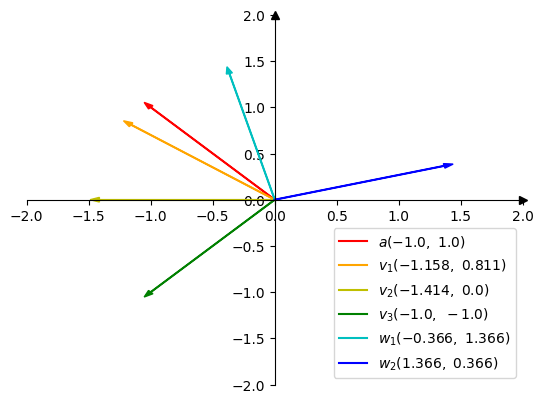

In [15]:
# Буду использовать функцию rotate_vec, описанную ранее
a = Matrix([-1, 1])


def plotvec(vect: tuple, axes: matplotlib.pyplot.gca, color):
    x, y = [float(vect[1][0]), float(vect[1][1])]
    axes.plot([0, x], [0, y], color=color,
              label=fr'${vect[0]}\left( {latex(round(x, 3))},\ {latex(round(y, 3))} \right)$')
    axes.arrow(0, 0, x, y, head_width=0.05, color=color)


rotated_vecs = dict()
for i, angle in enumerate([10, 45, 90]):
    rotated_vecs['v_' + str(i + 1)] = rotate_vec(a, angle, "deg", "->")

for i, angle in enumerate([Pi / 6, 2 * Pi / 3]):
    rotated_vecs['w_' + str(i + 1)] = rotate_vec(a, angle, "rad", "<-")

ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position(('data', 0))
ax.spines['left'].set_position(('data', 0))
ax.plot(1, 0, ">k", transform=ax.get_yaxis_transform(), clip_on=False)
ax.plot(0, 1, "^k", transform=ax.get_xaxis_transform(), clip_on=False)
ax.set(xlim=(-2, 2), ylim=(-2, 2))

colors = ('orange', 'y', 'g', 'c', 'b')
ind = 0
plotvec(('a', a), ax, 'r')
for name, coords in rotated_vecs.items():
    plotvec((name, coords), ax, colors[ind])
    ind += 1
ax.legend(loc='lower right')


### Задание 6*
Считать из файла "task_13_6.xlsx" координаты векторов на плоскости и углы поворота (крайний левый столбец в файле содержит имена векторов, следующие два - координаты векторов, затем угол поворота и последний столбец содержит текст "rad" или "deg", т.е. угол в радианах или градусах).

Для каждого вектора найти координаты вектора, полученного в результате поворота, затем записать в файл  "task_13_6_ans.xlsx" имена векторов  из файла "task_13_6.xlsx" и координаты  векторов, полученных в результате поворота. В файле  "task_13_6_ans.xlsx" подписи строк - имена векторов, подписи столбцов - имена координат, т.е. "x" и "y".

Изобразить на графике вектор [1, 2] из Задания 1 и результаты его поворота (по Заданию 1). В легенде графика для каждого вектора, кроме [1, 2] указать матрицу поворота, а для [1, 2] единичную матрицу.

In [16]:
with pd.ExcelWriter("/Users/almiravhadiev/Downloads/HSE/Math_Pracs/Algebra/Lab_13/Альмир_Авхадиев_task_13_6.xlsx", mode="a") as f:
    data_pd = pd.read_excel(f)
    data = data_pd.to_numpy()

    rotated_vecs = dict()
    for name, x, y, angle, angle_measure in data:
        # The condition doesn't specify, so each rotation are made in a counterclockwise direction
        rotated_vecs[name] = rotate_vec(Matrix([x, y]), angle, angle_measure, "<-")

    rotated_vecs_excel = list()
    for name, coords in rotated_vecs.items():
        rotated_vecs_excel.append(([name, round(float(coords[0]), 5), round(float(coords[1]), 5)]))

    rotated_vecs_excel_pd = pd.DataFrame(rotated_vecs_excel)
    rotated_vecs_excel_pd.to_excel(f, sheet_name="Rotated_vectors", header=['', 'x', 'y'], index=False)


FileNotFoundError: [Errno 2] No such file or directory: '/Users/almiravhadiev/Downloads/HSE/Math_Pracs/Algebra/Lab_13/Альмир_Авхадиев_task_13_6.xlsx'

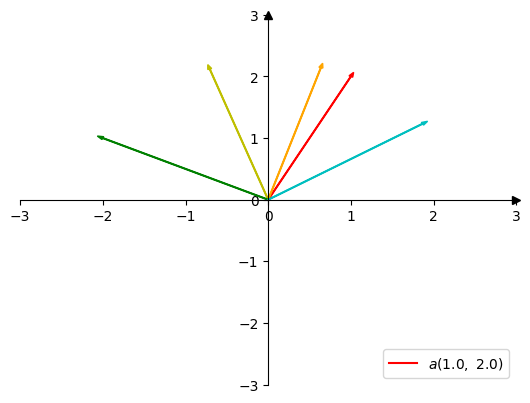

In [19]:
a = Matrix([1, 2])

rotated_vecs = dict()
for i, angle in enumerate([10, 45, 90]):
    rotated_vecs['v_' + str(i + 1)] = [rotate_vec(a, angle, "deg", "->"), Matrix([[(Cos(angle)), -Sin(angle)], [Sin(angle), Cos(angle)]])] # rotation matrix

for i, angle in enumerate([Pi / 6]):
    rotated_vecs['w_' + str(i + 1)] = [rotate_vec(a, angle, "rad", "<-"), Matrix([[Cos(angle), Sin(angle)], [-Sin(angle), Cos(angle)]])] # rotation matrix

ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position(('data', 0))
ax.spines['left'].set_position(('data', 0))
ax.plot(1, 0, ">k", transform=ax.get_yaxis_transform(), clip_on=False)
ax.plot(0, 1, "^k", transform=ax.get_xaxis_transform(), clip_on=False)
ax.set(xlim=(-3, 3), ylim=(-3, 3))


plotvec(('a', a), ax, 'r')

colors = ('orange', 'y', 'g', 'c')
ind = 0
for name, [coords, rotation_matrix] in rotated_vecs.items():
    x, y = coords
    x = float(x)
    y = float(y)
    
    ax.plot([0, x], [0, y], color=colors[ind])
    ax.arrow(0, 0, x, y, head_width=0.05, color=colors[ind])
    ind += 1
    
ax.legend(loc='lower right')


###  Индивидуальное задание
Найти собственные числа и собственные векторы линейного оператора. Построить матрицу оператора в заданном базисе. Построить матрицу оператора в базисе из собственных векторов.

Вывести на экран матрицу оператора А, матрицу перехода к базису ($e_1$, $e_2$, $e_3$), матрицу оператора в базисе ($e_1$, $e_2$, $e_3$), матрицу перехода к базису из собственных векторов, матрицу оператора в базисе из собственных векторов.

Даны матрица оператора A, векторы базиса $e_1$, $e_2$, $e_3$.

### Вариант №175

$$A = \left[\begin{matrix}106 & 78 & 46\\-168 & -124 & -72\\54 & 38 & 18\end{matrix}\right],\quad e_1 = \left[\begin{matrix}-3\\2\\-3\end{matrix}\right],\quad e_2 = \left[\begin{matrix}-1\\2\\-2\end{matrix}\right],\quad e_3 = \left[\begin{matrix}3\\2\\-1\end{matrix}\right]$$


In [21]:
from functools import partial
A = Matrix([[106, 78, 46], [-168, -124, -72], [54, 38, 18]])
e_1 = [-3, 2, -3]
e_2 = [-1, 2, -2]
e_3 = [3, 2, -1]

res = A.eigenvects()
display(Math(latex(res)))
print('Матрицы в базисе е:')
P = Matrix([e_1, e_2, e_3])
AE = P ** (-1) * A * P
display(Math(f'P = {latex(P)}, AE = {latex(AE)}'))
print('Матрицы в базисе из собственных векторов:')
P1 = Matrix([[9/13, 1, 7/10], [-1/13, 0, -1/10], [1, 1, 1]])
AV = P1 ** (-1) * A * P1
round3 = partial(round, ndigits=2)
AV = AV.applyfunc(round3)
display(Math(f'P = {latex(P1)}, AV = {latex(AV)}'))


<IPython.core.display.Math object>

Матрицы в базисе е:


<IPython.core.display.Math object>

Матрицы в базисе из собственных векторов:


<IPython.core.display.Math object>